<h1>MNIST DATASET </h1>

# Import Libraries

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import os
import cv2
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from tensorflow.keras.layers import Dense, Dropout, Flatten # core layers
from tensorflow.keras.layers import BatchNormalization
import warnings                      
warnings.simplefilter("ignore")  # ignores the warning

# Load .npy file

In [33]:
# Load the MNIST data from .npy file
data = np.load('data/mnist_data.npy', allow_pickle=True)
images = data.item().get('images')
labels = data.item().get('labels')

# Visualize

In [34]:
import random

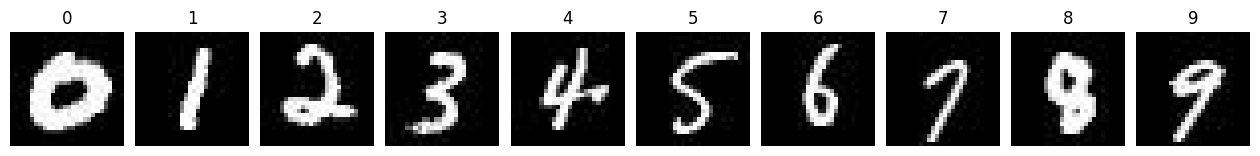

In [35]:
def random_value_for_index(labels, target_value):
    indices = [index for index, value in enumerate(labels) if value == target_value]
    return random.choice(indices)

# Define categories
categories = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Create subplots
fig, axs = plt.subplots(1, 10, figsize=(16, 16))

for index, category in enumerate(categories):
    # Select random image index from specific category
    random_index = random_value_for_index(labels, category)
    # Plot the random image
    axs[index].imshow(images[random_index].reshape(28, 28), cmap='gray')
    axs[index].axis('off')
    axs[index].set_title(category)

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

# Train Test Split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(images, labels, test_size=0.2, random_state=11)

In [37]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [38]:
x_train_reshaped = x_train.reshape((-1,28, 28,1))
x_test_reshaped = x_test.reshape((-1,28,28,1))

In [39]:
print("X_train shape : ",x_train_reshaped.shape)
print("y_train shape : ",y_train.shape)
print("X_test shape : ",x_test_reshaped.shape)
print("y_test shape : ",y_test.shape)


X_train shape :  (33600, 28, 28, 1)
y_train shape :  (33600,)
X_test shape :  (8400, 28, 28, 1)
y_test shape :  (8400,)


# Train CNN model

In [40]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [41]:
model=Sequential()

model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=16, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
    
model.add(Dense(10,activation="softmax"))
    

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Bat  (None, 13, 13, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 16)        9232      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                      

# Early Stopping

In [43]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_accuracy',patience=5)

In [44]:
# log_dir = "logs/mnist_cnn/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/mnist_cnn/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Compile

In [45]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train

In [46]:
history = model.fit(x_train_reshaped, y_train, epochs=5, batch_size=32, validation_split=0.3,callbacks=[early_stop,tensorboard_callback])

Epoch 1/5
735/735 [==============================] - 23s 29ms/step - loss: 0.4294 - accuracy: 0.8803 - val_loss: 0.2401 - val_accuracy: 0.9356
Epoch 2/5
735/735 [==============================] - 20s 28ms/step - loss: 0.1229 - accuracy: 0.9646 - val_loss: 0.1235 - val_accuracy: 0.9645
Epoch 3/5
735/735 [==============================] - 21s 28ms/step - loss: 0.0877 - accuracy: 0.9746 - val_loss: 0.0961 - val_accuracy: 0.9712
Epoch 4/5
735/735 [==============================] - 19s 26ms/step - loss: 0.0695 - accuracy: 0.9798 - val_loss: 0.2026 - val_accuracy: 0.9334
Epoch 5/5
735/735 [==============================] - 19s 26ms/step - loss: 0.0576 - accuracy: 0.9827 - val_loss: 0.0896 - val_accuracy: 0.9716


# Metrics

In [47]:
metrics=pd.DataFrame(model.history.history)

<Axes: >

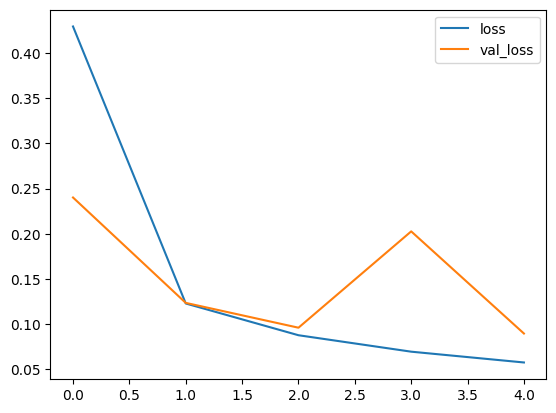

In [48]:
metrics[['loss','val_loss']].plot()

<Axes: >

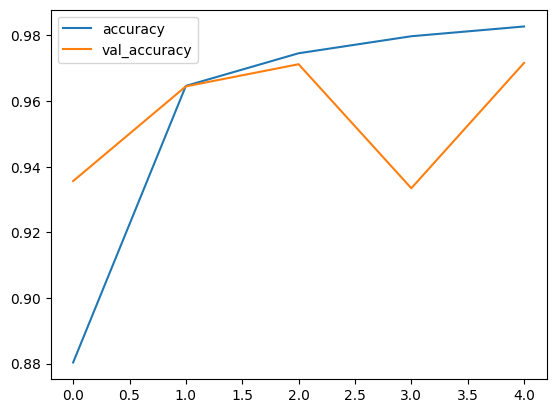

In [49]:
metrics[['accuracy', 'val_accuracy']].plot()

In [50]:
model.save("model/mnist_cnn.h5")

In [51]:
from keras.models import load_model
model= load_model("model/mnist_cnn.h5")

# Predict on Test data

In [52]:
y_pred = model.predict(x_test_reshaped)

263/263 [==============================] - 2s 7ms/step


In [53]:
y_pred = np.argmax(y_pred, axis=1)

<h2>Model Evaluation</h2>

In [54]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score,classification_report

In [55]:
print("Model's acuracy :",accuracy_score(y_pred,y_test))
print("Recall-Score :",recall_score(y_pred,y_test,average="macro"))
print("Precision-Score :",precision_score(y_pred,y_test,average="macro"))
print("F1-Score :",f1_score(y_pred,y_test,average="macro"))

Model's acuracy : 0.9701190476190477
Recall-Score : 0.9701281245815008
Precision-Score : 0.9701987244425112
F1-Score : 0.9698431422458439


In [56]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       840
           1       0.98      1.00      0.99       915
           2       0.98      0.96      0.97       868
           3       0.97      0.98      0.97       857
           4       0.97      0.98      0.97       821
           5       0.96      0.99      0.97       744
           6       0.99      0.98      0.98       820
           7       0.95      0.99      0.97       867
           8       0.99      0.90      0.94       855
           9       0.95      0.94      0.95       813

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



# Confusion Matrix

In [57]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

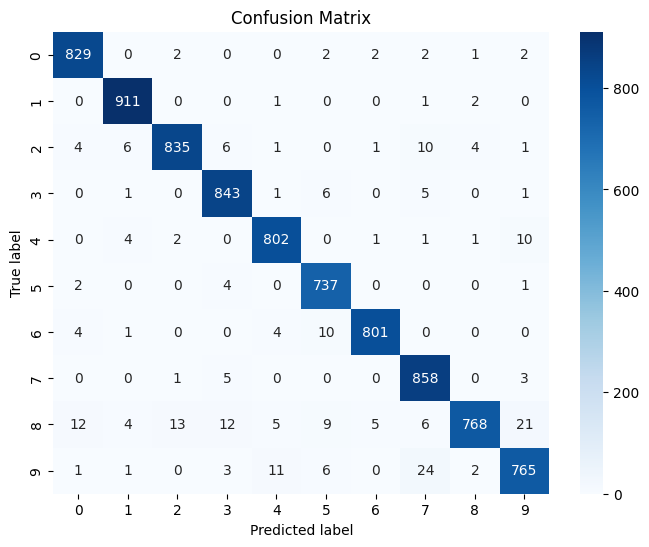

In [58]:
# Compute confusion matrix
cm = confusion_matrix(y_pred , y_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Visualize

In [59]:
from tensorflow.keras.models import Model

In [60]:
def get_layer_output(model, layer_name, input_image):
    layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    output = layer_model.predict(input_image)
    return output

def plot_conv_layer_outputs(layer_output, layer_name, num_columns=8):
    num_filters = layer_output.shape[-1]
    size = layer_output.shape[1]
    
    num_rows = int(np.ceil(num_filters / num_columns))
    
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns*2, num_rows*2))
    axes = axes.flatten()
    
    for i in range(num_filters):
        ax = axes[i]
        ax.imshow(layer_output[0, :, :, i], cmap='gray')
        ax.axis('off')
        ax.set_title(f'{layer_name} {i+1}')
    
    # Hide unused subplots
    for j in range(num_filters, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

def plot_dense_layer_output(layer_output, layer_name):
    plt.figure(figsize=(10, 5))
    plt.bar(range(layer_output.shape[1]), layer_output[0], color='skyblue')
    plt.title(f'{layer_name} Output')
    plt.xlabel('Neuron')
    plt.ylabel('Activation')
    plt.grid(True)
    plt.show()


In [61]:
sample_image = cv2.imread("data/test/img_3.jpg",cv2.IMREAD_GRAYSCALE)
sample_image = np.expand_dims(sample_image, axis=0)  


1/1 [==============================] - 0s 56ms/step


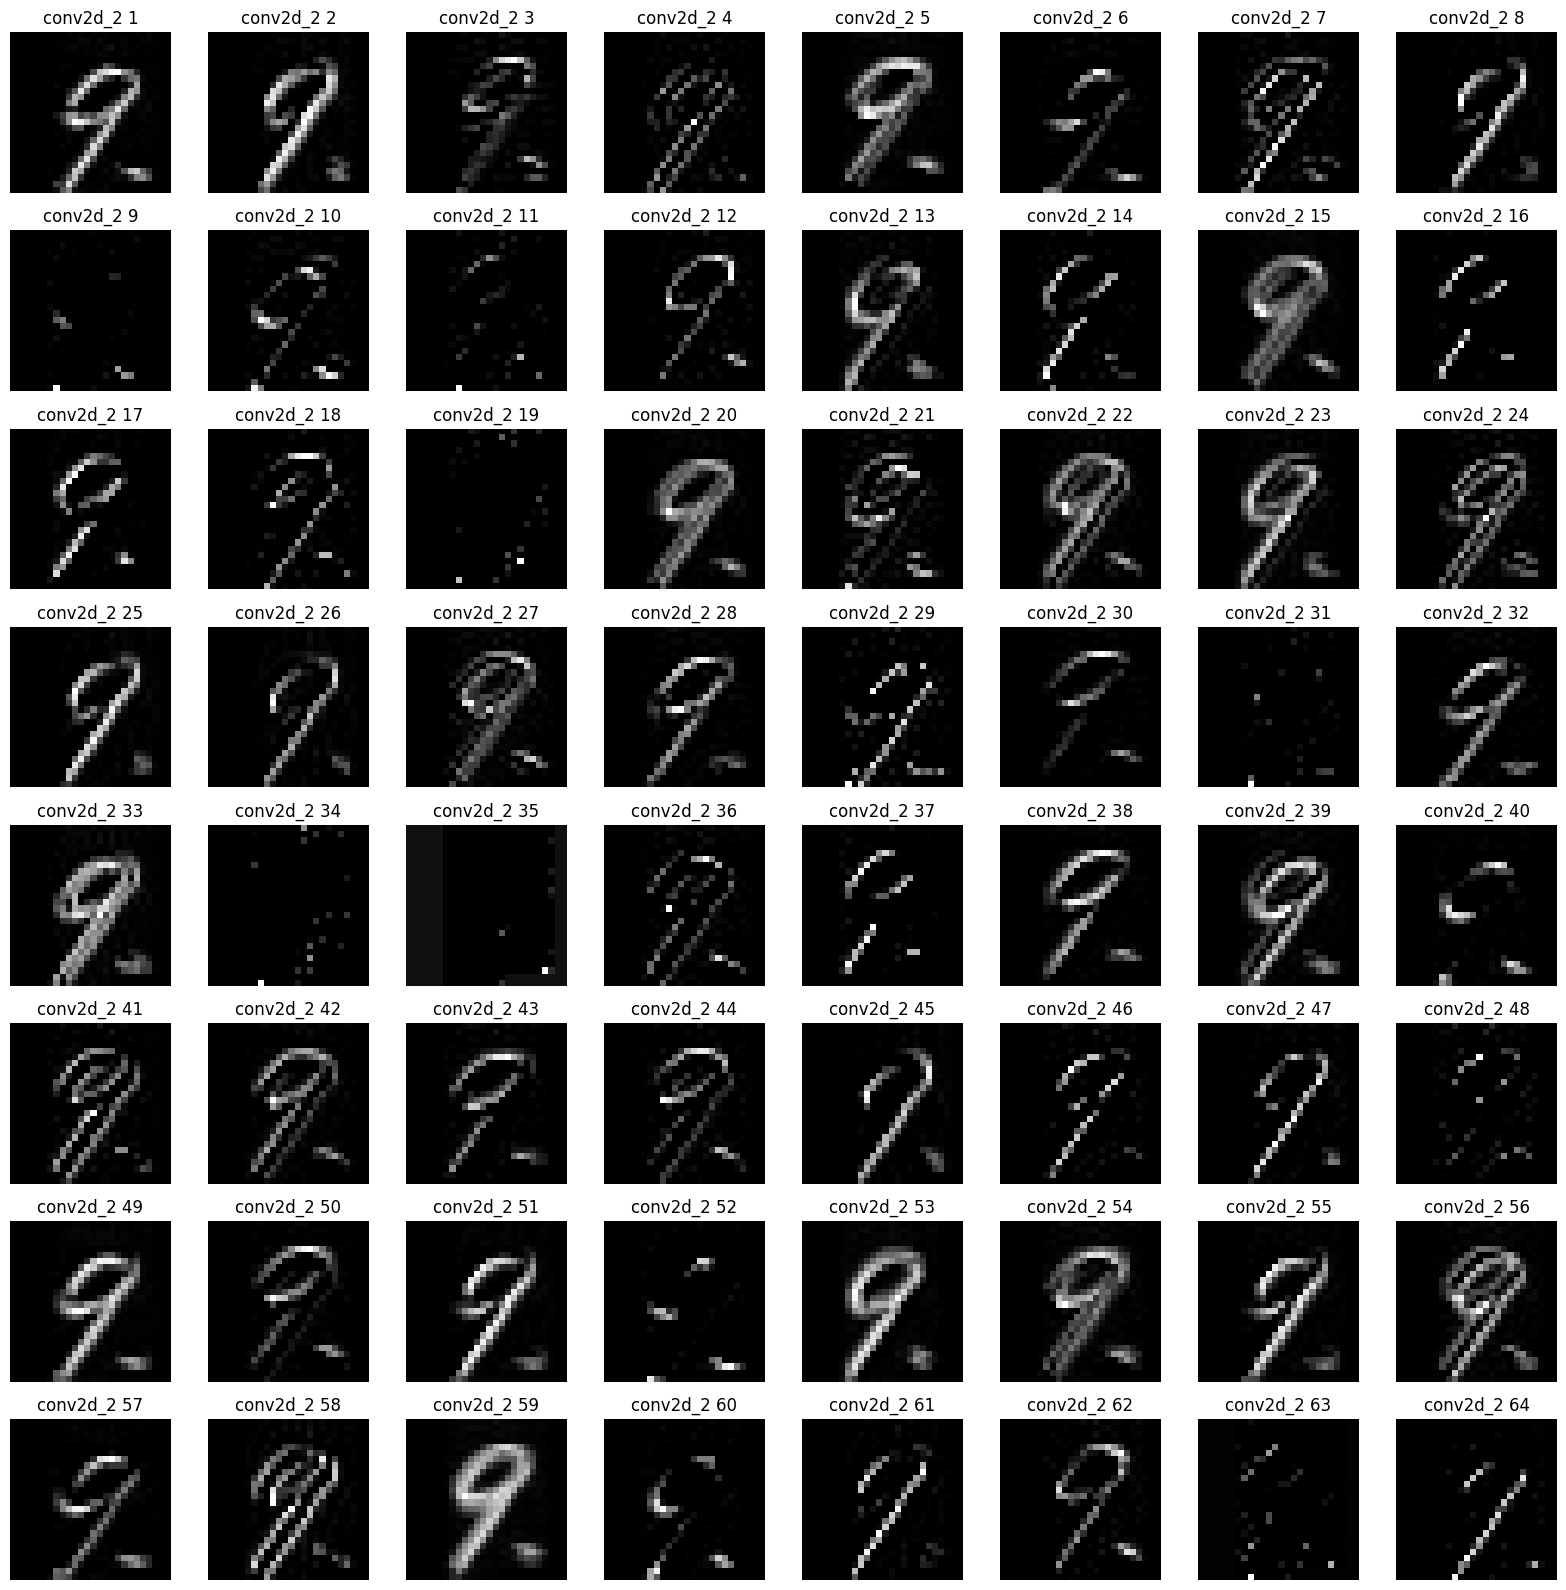

1/1 [==============================] - 0s 59ms/step


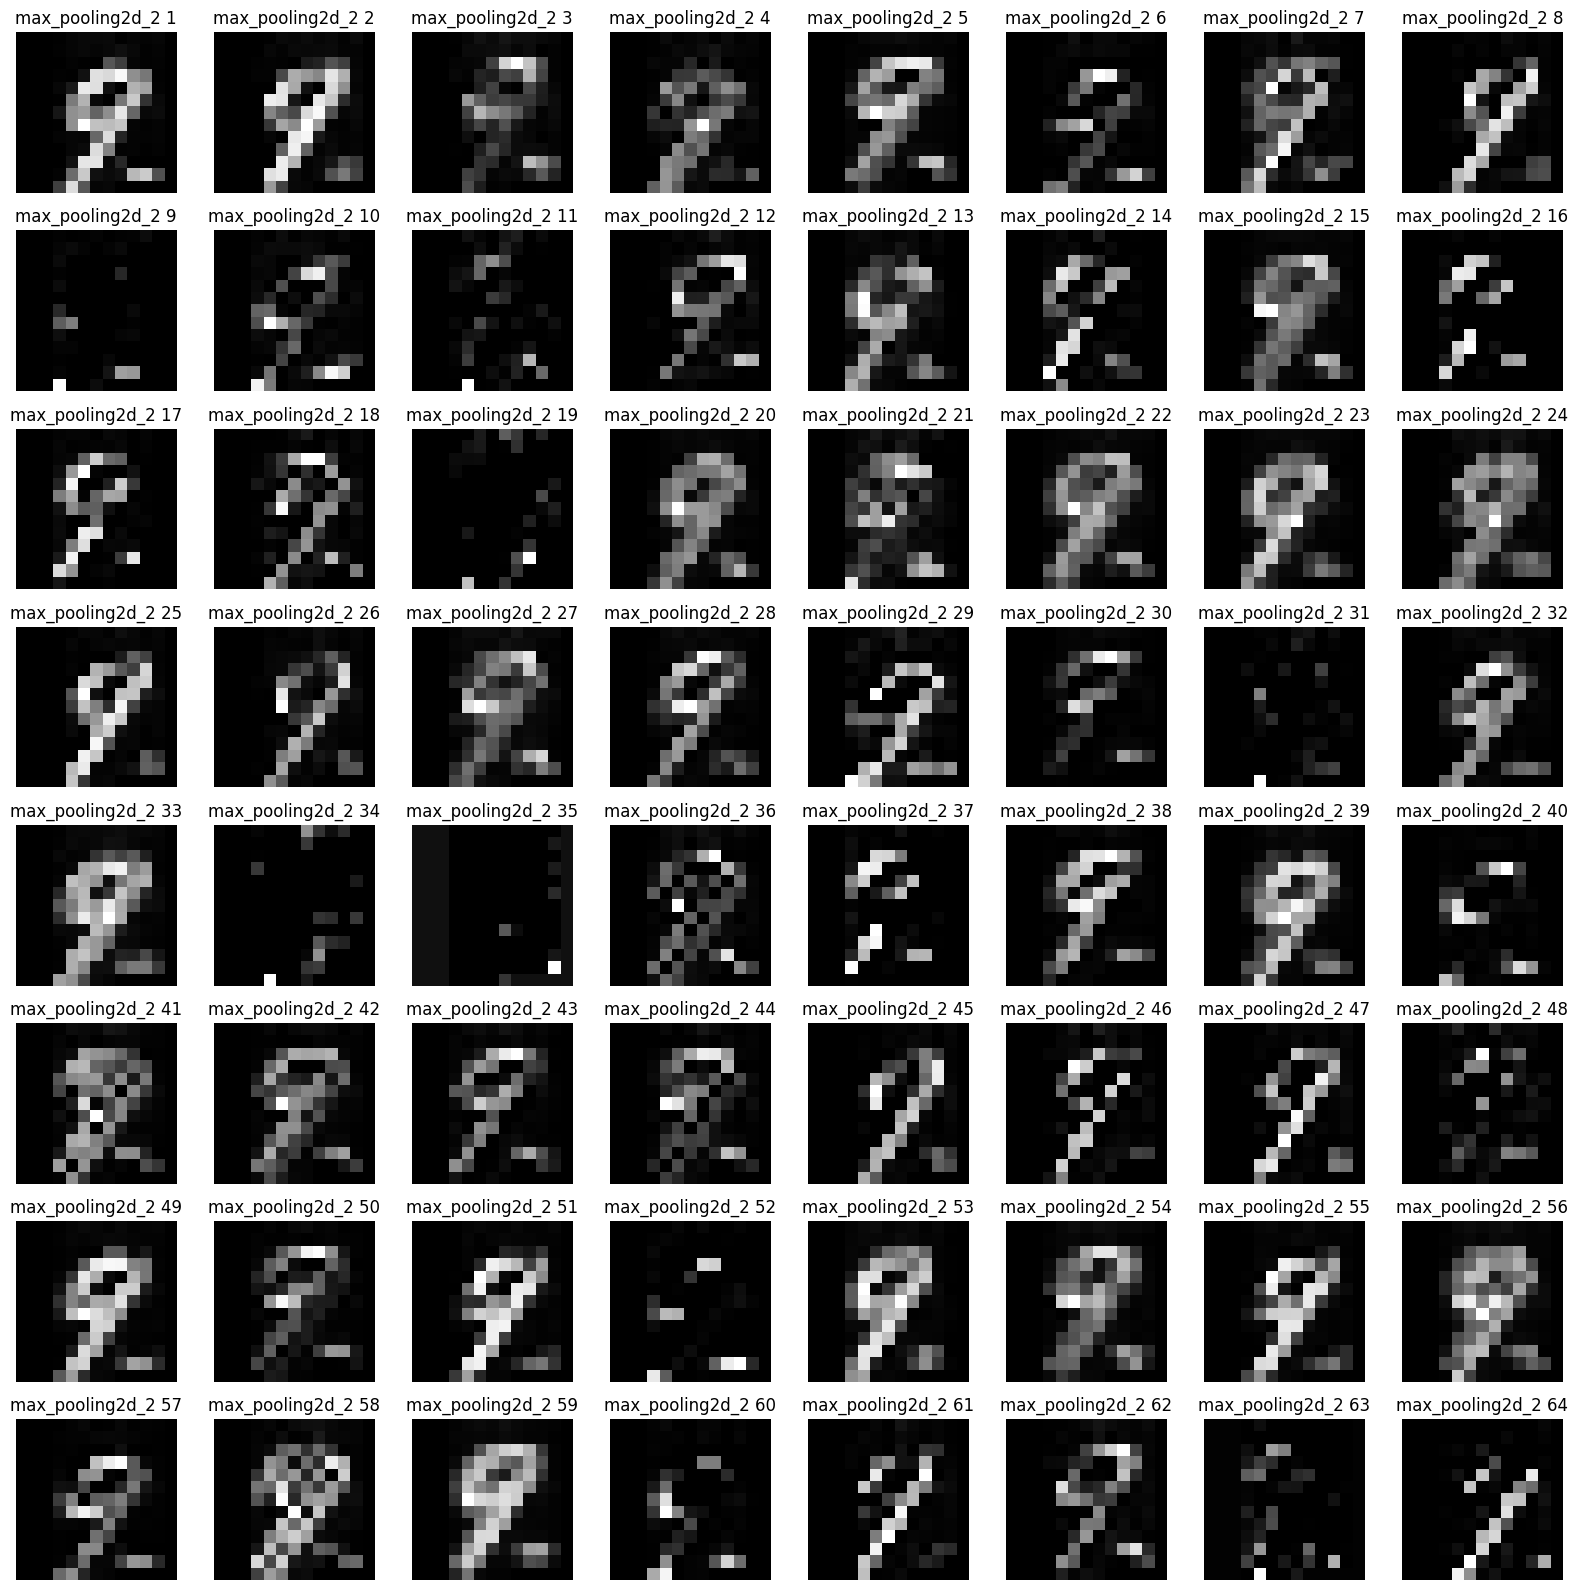

1/1 [==============================] - 0s 84ms/step


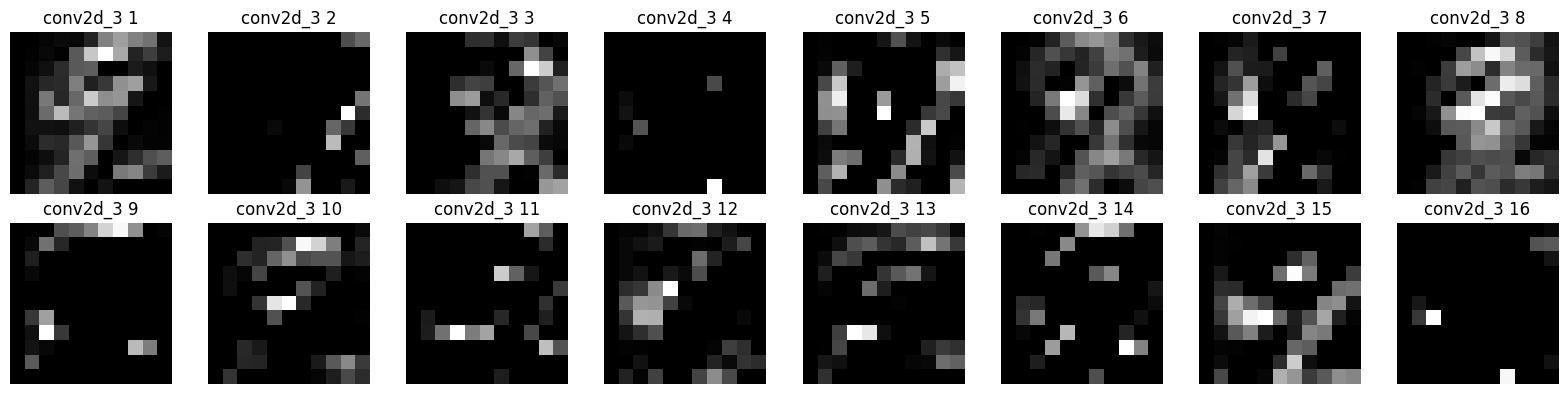

1/1 [==============================] - 0s 89ms/step


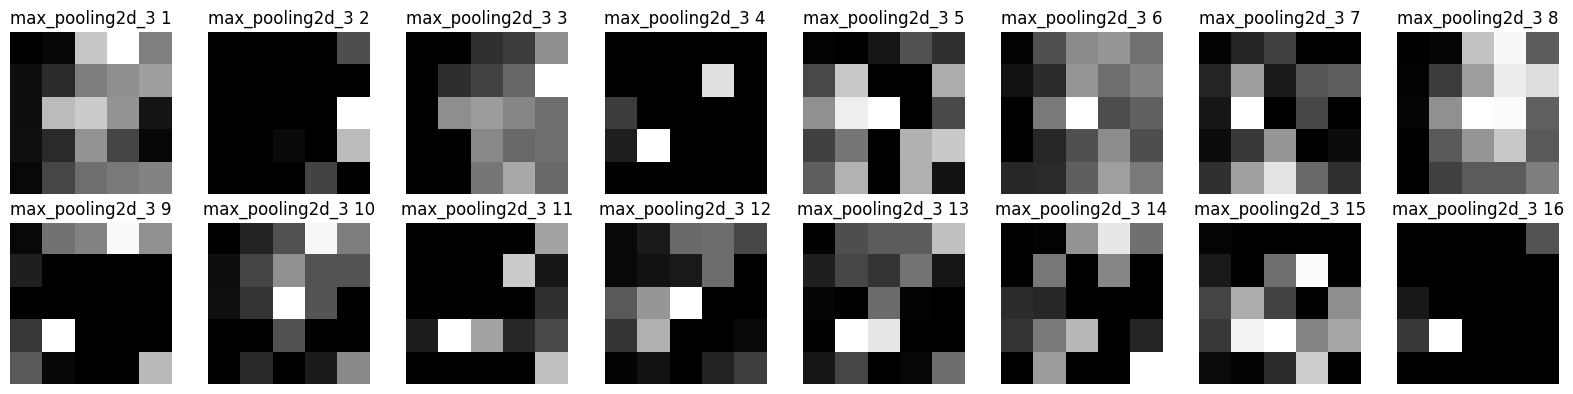

1/1 [==============================] - 0s 108ms/step


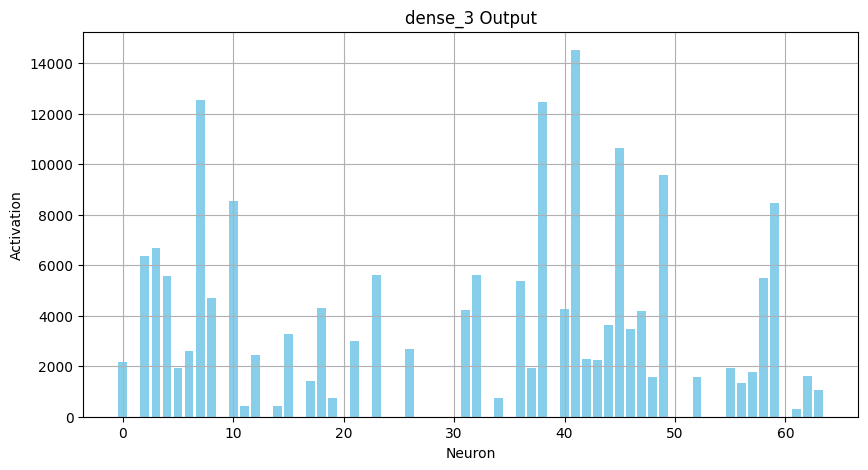

1/1 [==============================] - 0s 118ms/step


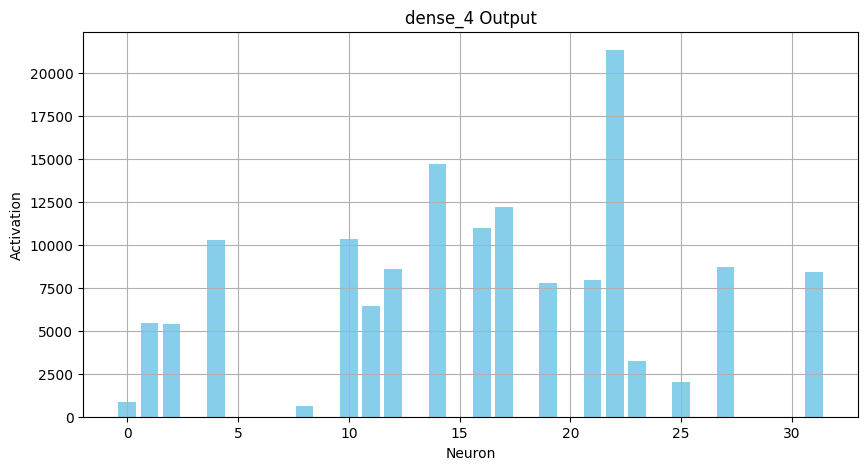

1/1 [==============================] - 0s 122ms/step


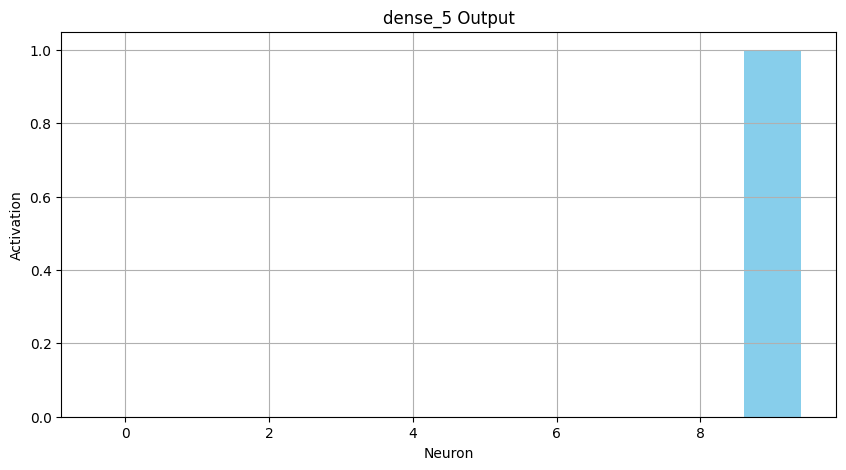

In [62]:
# Iterate through all layers to get and plot activations
for layer in model.layers:
    print(layer)
    
    # For convolutional layers
    if 'conv' in layer.name:
        layer_output = get_layer_output(model, layer.name, sample_image)
        plot_conv_layer_outputs(layer_output, layer.name)
    
    # For dense layers
    elif 'dense' in layer.name:
        layer_output = get_layer_output(model, layer.name, sample_image)
        plot_dense_layer_output(layer_output, layer.name)
    
    # For max pooling layers
    elif 'pool' in layer.name or 'max_pool' in layer.name:
        layer_output = get_layer_output(model, layer.name, sample_image)
        plot_conv_layer_outputs(layer_output, layer.name)  # Use the same function as for conv layers


# Assignment

<li> Perform Inference </li>